In [3]:
# import matplotlib as mpl
# mpl.use('Agg')
import pandas as pd
import numpy as np
import random
import swifter
random.seed(42)
from matplotlib import pyplot as plt

/Users/vedant/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
df = pd.read_csv('../data/tripData2013/trip_data_1.csv') # file for january

In [5]:
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [6]:
len(set(df['medallion'])), len(set(df['hack_license']))

(13426, 32224)

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
aggregate_df = df.groupby([df['pickup_datetime'].dt.date])['pickup_datetime'].agg('count')
aggregate_df.head()

pickup_datetime
2013-01-01    412630
2013-01-02    393001
2013-01-03    441233
2013-01-04    478437
2013-01-05    473804
Name: pickup_datetime, dtype: int64

In [9]:
assert aggregate_df.sum() == len(df) # sanity check: sum of frequencies of all days of january == all rides in January

/Users/vedant/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


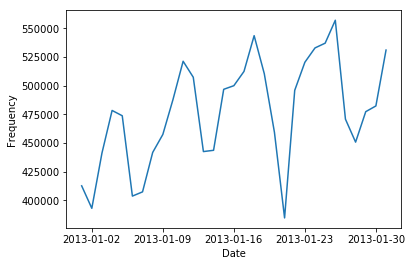

In [10]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_df.index, aggregate_df)
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
plt.savefig('jan_date_vs_rides_dist.png')
plt.show()

In [11]:
aggregate_time = df.groupby([df['pickup_datetime'].dt.hour])['pickup_datetime'].agg('count')
aggregate_time, len(aggregate_time)

(pickup_datetime
 0     531347
 1     401365
 2     307314
 3     227515
 4     164900
 5     143100
 6     304640
 7     546976
 8     694630
 9     700817
 10    658908
 11    675108
 12    723139
 13    721154
 14    757578
 15    743037
 16    647936
 17    767050
 18    934546
 19    941645
 20    866823
 21    833123
 22    806661
 23    677303
 Name: pickup_datetime, dtype: int64, 24)

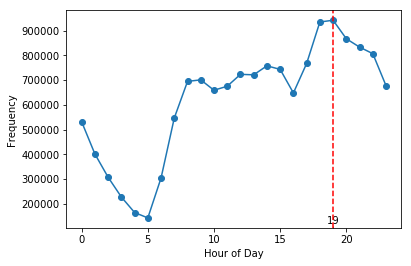

In [12]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_time.index, aggregate_time, marker='o')

peak_hour = np.argmax(np.array(aggregate_time))

ax.axvline(x=peak_hour, linestyle='--', color='r')
ax.tick_params('x', which='minor', direction='in', pad=-12)
ax.xaxis.set_ticks([peak_hour], minor=True)
ax.xaxis.set_ticklabels(list(map(str, [peak_hour])), minor=True)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Frequency')
plt.savefig('jan_hour_vs_rides_dist.png')
plt.show()

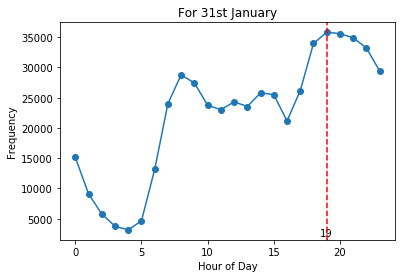

In [13]:
aggregate_time_last_day = df.groupby([df['pickup_datetime'][df['pickup_datetime'].dt.day == 31].dt.hour])['pickup_datetime'].agg('count')

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aggregate_time_last_day.index, aggregate_time_last_day, marker='o')

peak_hour = np.argmax(np.array(aggregate_time_last_day))

ax.axvline(x=peak_hour, linestyle='--', color='r')
ax.tick_params('x', which='minor', direction='in', pad=-12)
ax.xaxis.set_ticks([peak_hour], minor=True)
ax.xaxis.set_ticklabels(list(map(str, [peak_hour])), minor=True)
ax.set_title('For 31st January')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Frequency')
plt.savefig('31_jan_hour_vs_rides_dist.png')
plt.show()

## Weed out the invalid latitude and longitudes

In [14]:
(np.min(df['pickup_latitude']), np.min(df['dropoff_latitude']),
    np.max(df['pickup_latitude']), np.max(df['dropoff_latitude']))

(-3547.9207, -3547.9207, 3310.3645, 3477.1055)

In [15]:
(min(df['pickup_longitude'].min(), df['dropoff_longitude'].min()),
    max(df['pickup_longitude'].max(), df['dropoff_longitude'].max()))

(-2771.2854, 2228.7375)

In [16]:
def valid_coordinate_bool(series, lower, upper):
    """
    series is a list of pandas series objects
    lower and upper are lower and upper bound for coordinates to be valid
    """
    final_condition = np.logical_and(np.abs(series[0]) > lower, np.abs(series[0]) < upper)
    for i in range(1, len(series)):
        final_condition = np.logical_and(final_condition, np.logical_and(np.abs(series[i]) > lower, np.abs(series[i]) < upper))
    return final_condition
    

In [17]:
valid_latitudes = valid_coordinate_bool([df['pickup_latitude'], df['dropoff_latitude']], 40.4, 41)
valid_longitudes = valid_coordinate_bool([df['pickup_longitude'], df['dropoff_longitude']], 73, 75)
valid_rows_bool = np.logical_and(valid_latitudes, valid_longitudes)

In [18]:
np.count_nonzero(valid_rows_bool), len(df), len(df) - np.count_nonzero(valid_rows_bool)

(14486242, 14776615, 290373)

In [19]:
filtered_df = df.iloc[df.index[valid_rows_bool]]
filtered_df['pickup_longitude'][filtered_df['pickup_longitude'] > 0] *= -1
filtered_df['dropoff_longitude'][filtered_df['dropoff_longitude'] > 0] *= -1
filtered_df.head()

/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vedant/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/vedant/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/vedant/anacond

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [20]:
assert len(filtered_df) == np.count_nonzero(valid_rows_bool)

## Assign Driver Races and Genders

In [43]:
drivers = np.unique(df['hack_license'])
drivers_races = np.array(['black'] * len(drivers))
drivers_gender = np.array(['m'] * len(drivers))
random.seed(42)
drivers_races[random.sample(list(np.arange(len(drivers))), k=int(len(drivers)/3))] = ['white'] # 2:1 black:white
random.seed(42)
drivers_gender[random.sample(list(np.arange(len(drivers))), k=int(len(drivers)/6))] = ['f'] # 5:1 males:females

In [44]:
random.seed(42)
drivers_gender[random.sample(list(np.arange(len(drivers))), k=int(len(drivers)/6))]

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype='<U1')

In [45]:
hack_id_to_race = dict(zip(drivers, drivers_races))
hack_id_to_gender = dict(zip(drivers, drivers_gender))
(np.count_nonzero(drivers_races == 'black')/np.count_nonzero(drivers_races == 'white'), 
 np.count_nonzero(drivers_gender == 'm')/np.count_nonzero(drivers_gender == 'f'))

(2.0000931012010055, 5.000744878957169)

In [46]:
driver_race_series = filtered_df['hack_license'].map(hack_id_to_race)
driver_gender_series = filtered_df['hack_license'].map(hack_id_to_gender)

In [47]:
np.count_nonzero(driver_race_series == 'black'), np.count_nonzero(driver_race_series == 'white')

(9685386, 4800856)

In [48]:
filtered_df['driver_race'] = driver_race_series
filtered_df['driver_gender'] = driver_gender_series
filtered_df.head()

/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,driver_race,driver_gender
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,black,m
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660,black,m
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002,black,m
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,black,m
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868,black,m


## Assign Requests' Race and Gender

In [49]:
requests_gender = np.array(['f'] * len(filtered_df))
requests_race = np.array(['black'] * len(filtered_df))
random.seed(42)
requests_race[random.sample(list(np.arange(len(requests_race))), k=int(len(requests_race)/3))] = 'white'

r1_indices = np.where(requests_race == 'black')[0]
random.seed(42)
random_choice_r1 = random.sample(list(r1_indices), k=int(len(r1_indices)/2))
requests_gender[random_choice_r1] = 'm'
print (np.count_nonzero(requests_gender == 'm'))
assert np.count_nonzero(requests_gender == 'm') == len(random_choice_r1)
r2_indices = np.where(requests_race == 'white')[0]
random.seed(42)
random_choice_r2 = random.sample(list(r2_indices), k=int(len(r2_indices)/2))
requests_gender[random_choice_r2] = 'm'

4828747


In [50]:
assert len(r1_indices) + len(r2_indices) == len(requests_race)
assert len(set(list(r1_indices)).intersection(set(list(r2_indices)))) == 0
assert len(set(list(random_choice_r1)).intersection(set(list(random_choice_r2)))) == 0

In [51]:
(np.count_nonzero(requests_gender == 'm'), np.count_nonzero(requests_gender == 'f'),
     np.count_nonzero(requests_race == 'white'), np.count_nonzero(requests_race == 'black'))

(7243120, 7243122, 4828747, 9657495)

In [52]:
filtered_df['requests_gender'] = requests_gender
filtered_df['requests_race'] = requests_race
filtered_df.head()

/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,driver_race,driver_gender,requests_gender,requests_race
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171,black,m,f,black
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660,black,m,f,black
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002,black,m,f,black
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388,black,m,m,black
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868,black,m,m,black


In [53]:
min_latitude = min(np.min(filtered_df['pickup_latitude']), np.min(filtered_df['dropoff_latitude']))
max_latitude = max(np.max(filtered_df['pickup_latitude']), np.max(filtered_df['dropoff_latitude']))
min_longitude = min(np.min(filtered_df['pickup_longitude']), np.min(filtered_df['dropoff_longitude']))
max_longitude = max(np.max(filtered_df['pickup_longitude']), np.max(filtered_df['dropoff_longitude']))

In [54]:
np.arange(min_longitude, max_longitude, 0.05), np.arange(min_latitude, max_latitude, 0.05)

(array([-74.98333, -74.93333, -74.88333, -74.83333, -74.78333, -74.73333,
        -74.68333, -74.63333, -74.58333, -74.53333, -74.48333, -74.43333,
        -74.38333, -74.33333, -74.28333, -74.23333, -74.18333, -74.13333,
        -74.08333, -74.03333, -73.98333, -73.93333, -73.88333, -73.83333,
        -73.78333, -73.73333, -73.68333, -73.63333, -73.58333, -73.53333,
        -73.48333, -73.43333, -73.38333, -73.33333, -73.28333, -73.23333,
        -73.18333, -73.13333, -73.08333, -73.03333]),
 array([40.400002, 40.450002, 40.500002, 40.550002, 40.600002, 40.650002,
        40.700002, 40.750002, 40.800002, 40.850002, 40.900002, 40.950002]))

In [55]:
def coordinates_to_bin(val, coordinate_type):
    steps = (val - min_latitude)/0.05 if coordinate_type == 'latitude' else (val - min_longitude)/0.05
#     if np.isclose(int(steps), steps, rtol=0, atol=0.00000001):
#         steps += 1
    return int(steps)

In [56]:
filtered_df['pickup_lat_bin'] = filtered_df['pickup_latitude'].swifter.apply(coordinates_to_bin, args=('latitude',))
filtered_df['pickup_long_bin'] = filtered_df['pickup_longitude'].swifter.apply(coordinates_to_bin, args=('longitude',))
filtered_df['dropoff_lat_bin'] = filtered_df['dropoff_latitude'].swifter.apply(coordinates_to_bin, args=('latitude',))
filtered_df['dropoff_long_bin'] = filtered_df['dropoff_longitude'].swifter.apply(coordinates_to_bin, args=('longitude',))

Widget Javascript not detected.  It may not be installed or enabled properly.


/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
Widget Javascript not detected.  It may not be installed or enabled properly.


/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
Widget Javascript not detected.  It may not be installed or enabled properly.


/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
Widget Javascript not detected.  It may not be installed or enabled properly.


/Users/vedant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [57]:
cols_to_drop = ['vendor_id', 'rate_code', 'store_and_fwd_flag', 'passenger_count']
filtered_df.drop(columns=cols_to_drop, inplace=True)
filtered_df.to_csv('../data/tripData2013/trip_data_1_filtered.csv', index=False)

/Users/vedant/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


KeyboardInterrupt: 